## **The Sparks Foundation -Data Science & Business Analytics Internship**

## Task 1- Prediction using Supervised Machine Learning

In this task we required to predict he percentage of a student on the basis of number of hours he/she studied using the Linear Regression Supervised Learning Algorithm.

Suyash Mejari

In [71]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

#To ignore the warnings 
import warnings as ws
ws.filterwarnings("ignore")

In [72]:
# Reading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [73]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [74]:
df.shape

(25, 2)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [77]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

To find the co-relation between the data we would plot the graphs

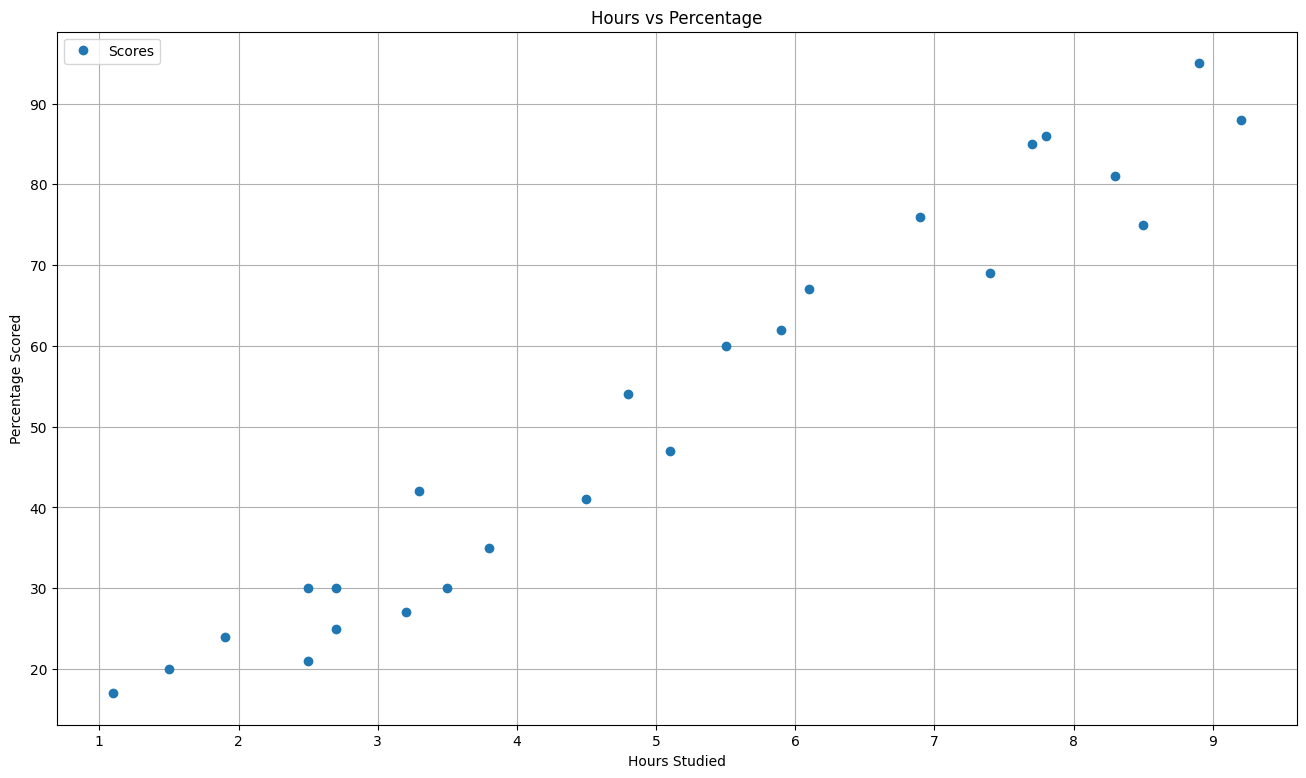

In [78]:
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours',y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()



From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.

In [79]:
# To describe the co-relation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [80]:
# Dividing the data using the iloc function
x=df.iloc[:, :1].values
y=df.iloc[:, 1:].values

In [81]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [82]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

* Training the Model Using the Linear Regression Algorithm

In [83]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

Now we have to split our data in Training and Testing sets, first to train the Model

In [84]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

* Visualizing the Model

After training the model we will now visualize it.

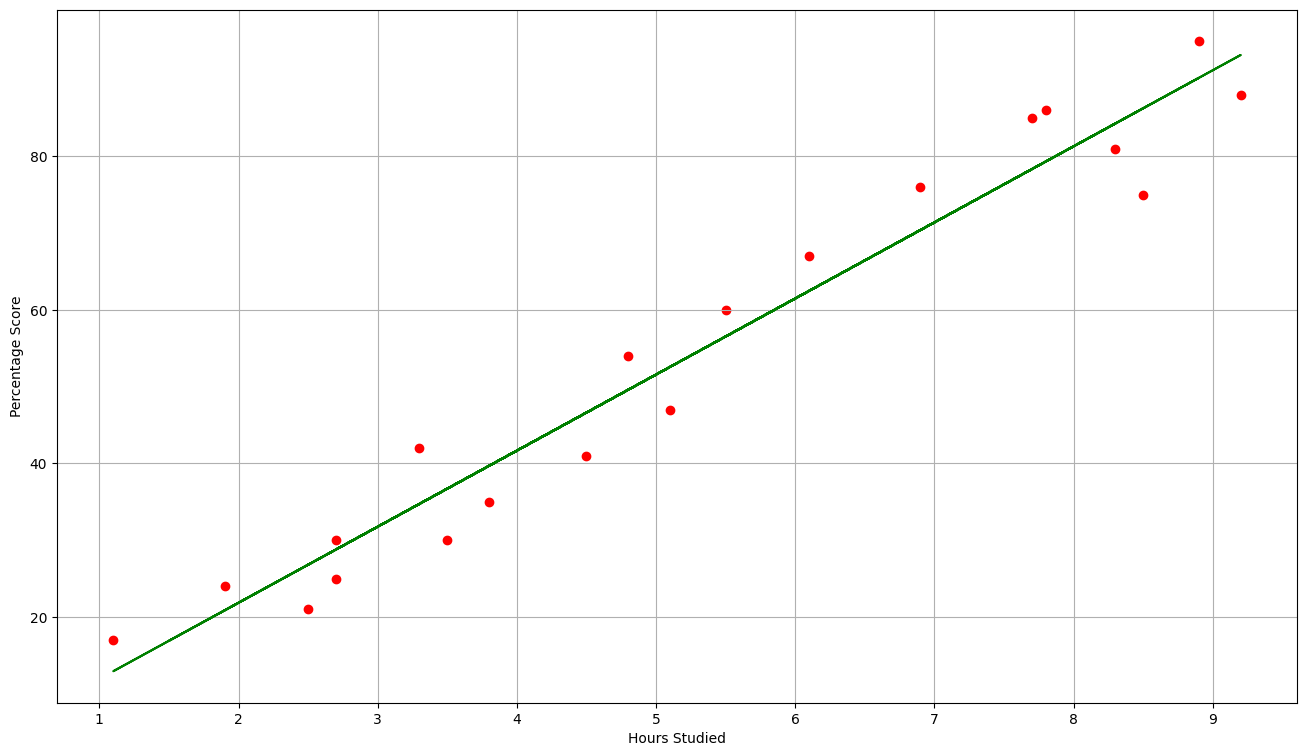

In [85]:
line = model.coef_*x + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

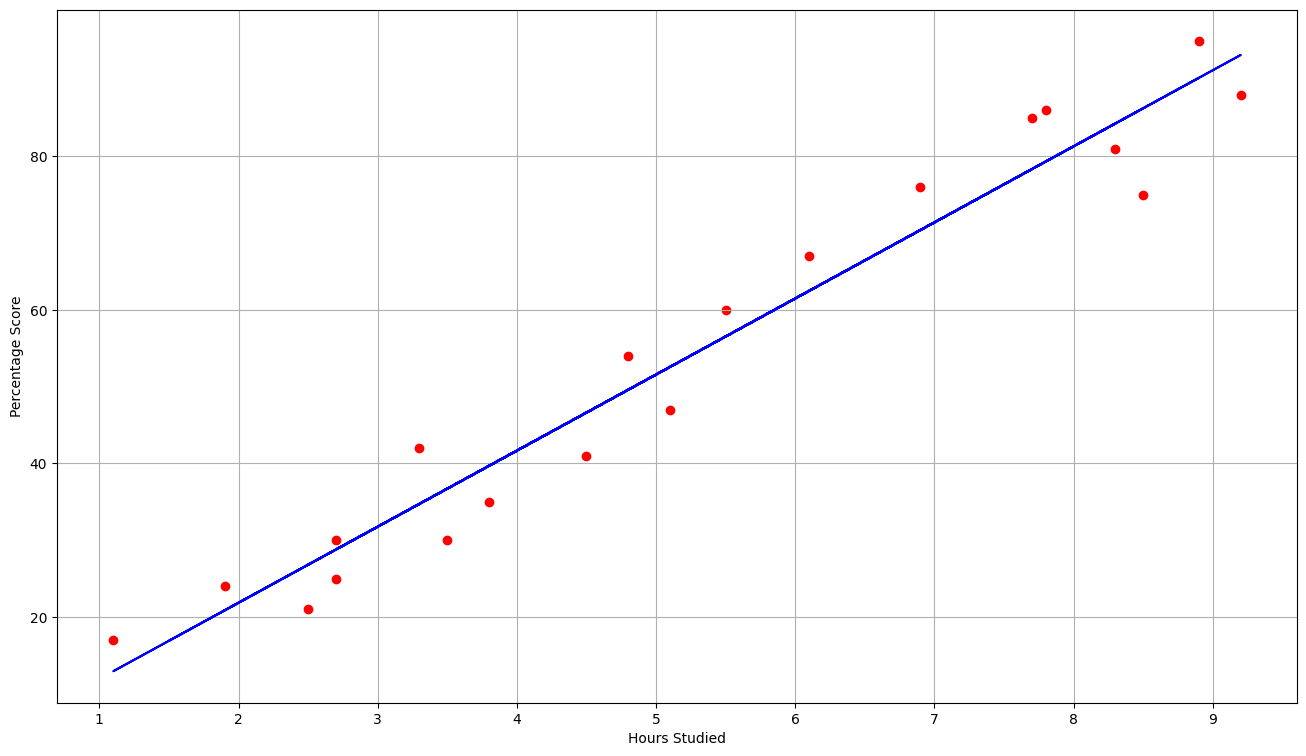

In [93]:
# Now for Testing
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='blue')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

Now to make some Predictions using the trained Model

In [87]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [88]:
#Comparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [89]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [90]:
comp= pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [94]:
hours = 9.25
my_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",my_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


Finally we will evaluate our model by calculating mean absolute error 

In [92]:
from sklearn import metrics 
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred) )

Mean Absolute Error:  4.183859899002975
